In a row of dominoes, tops[i] and bottoms[i] represent the top and bottom halves of the ith domino. (A domino is a tile with two numbers from 1 to 6 - one on each half of the tile.)

We may rotate the ith domino, so that tops[i] and bottoms[i] swap values.

Return the minimum number of rotations so that all the values in tops are the same, or all the values in bottoms are the same.

If it cannot be done, return -1.

Example 1:

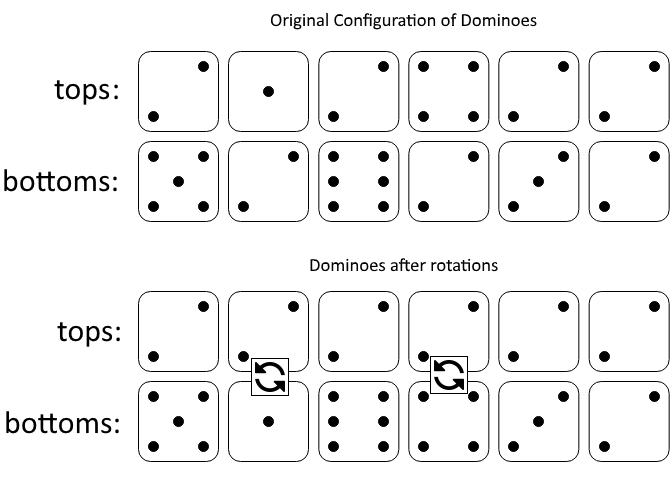

Input: tops = [2,1,2,4,2,2], bottoms = [5,2,6,2,3,2]
Output: 2
Explanation: 
The first figure represents the dominoes as given by tops and bottoms: before we do any rotations.
If we rotate the second and fourth dominoes, we can make every value in the top row equal to 2, as indicated by the second figure.

Example 2:

Input: tops = [3,5,1,2,3], bottoms = [3,6,3,3,4]
Output: -1
Explanation: 
In this case, it is not possible to rotate the dominoes to make one row of values equal.

 

Constraints:

    2 <= tops.length <= 2 * 104
    bottoms.length == tops.length
    1 <= tops[i], bottoms[i] <= 6



In [54]:
from typing import List
from collections import Counter

class Solution:
    def minDominoRotations(self, tops: List[int], bottoms: List[int]) -> int:
        c = Counter(tops + bottoms)

        cands = [k for k, v in c.items() if v >= len(tops)]
        if not cands:
            return -1
        
        for i, j in zip(tops, bottoms):
            for cand in cands:
                if not ((i == cand) or (j == cand)):
                    cands.pop(cands.index(cand))
                    
            if not cands:
                return -1
            
        val = cands[0]
        ctop = Counter(tops)
        cbottom = Counter(bottoms)
        result = len(tops) - max(ctop.get(val, 0), cbottom.get(val, 0))
        return result

In [ ]:
class Solution:
    def minDominoRotations(self, tops: List[int], bottoms: List[int]) -> int:
        total = len(tops)
        top_fr, bot_fr, val_total = [0]*7, [0]*7, [total]*7
        for top, bot in zip(tops, bottoms):
            if top == bot:
                val_total[top] -= 1
            else:
                top_fr[top] += 1
                bot_fr[bot] += 1
                
        for val in range(1, 7):
            if (val_total[val] - top_fr[val]) == bot_fr[val]:
                return min(top_fr[val], bot_fr[val])
            
        return -1


In [55]:
s = Solution()
s.minDominoRotations(tops = [2,1,2,4,2,2], bottoms = [5,2,6,2,3,2])

2

In [56]:
s.minDominoRotations(tops = [3,5,1,2,3], bottoms = [3,6,3,3,4])

-1

In [57]:
import random
import time

tops = [random.randint(1, 6) for _ in range(10000)]
bottoms = [random.randint(1, 6) for _ in range(10000)]
s.minDominoRotations(tops, bottoms)

-1

In [58]:
import random
import time

tops = [3 for _ in range(10000)]
bottoms = [random.randint(1, 6) for _ in range(10000)]
s.minDominoRotations(tops, bottoms)

0

In [60]:
import random
import time

tops = []
bottoms = []
for _ in range(10000):
    tops.extend([3, 5])
    bottoms.extend([5, 3])

s.minDominoRotations(tops, bottoms)

10000